In [3]:
!pip install scikit-fuzzy

Masukkan nama mahasiswa: Agus sakit
Masukkan persentase kehadiran dalam persen (0-100): 90
Masukkan nilai ujian (0-100): 100
Masukkan nilai praktikum (0-100): 90

--- Hasil Fuzzifikasi ---
Kehadiran
Tidak Pernah = 0.00
Jarang = 0.00
Sering = 0.80

Nilai Ujian
Rendah = 0.00
Sedang = 0.00
Tinggi = 1.00

Nilai Praktikum
Rendah = 0.00
Sedang = 0.00
Tinggi = 0.60

Nama Mahasiswa: Agus sakit
Keputusan Status Kelulusan: 81.43
Mahasiswa dinyatakan lulus.


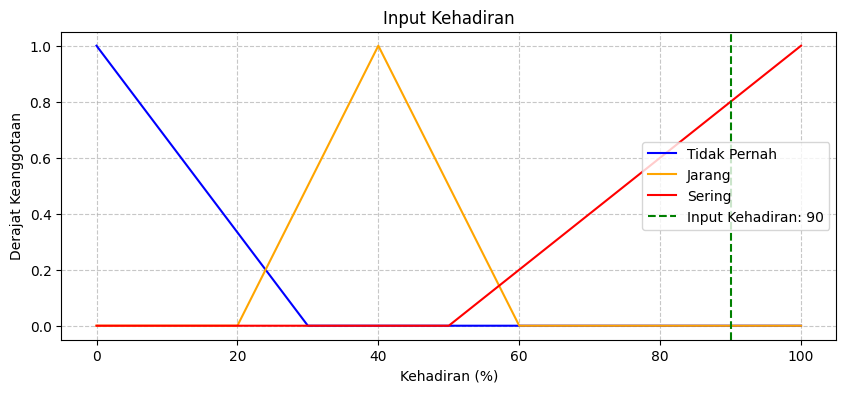

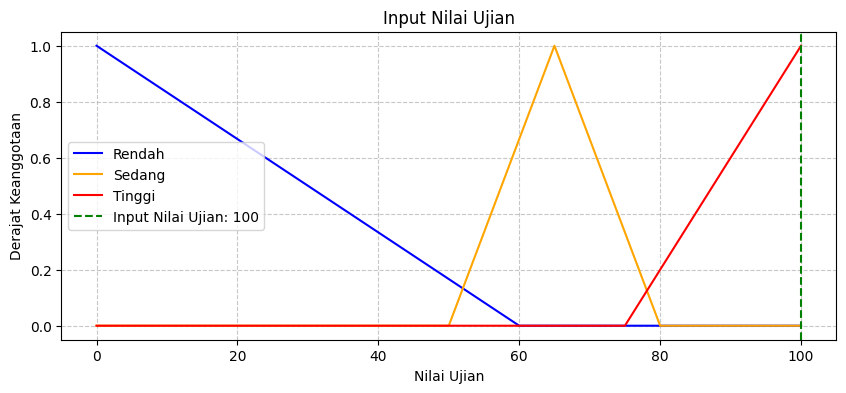

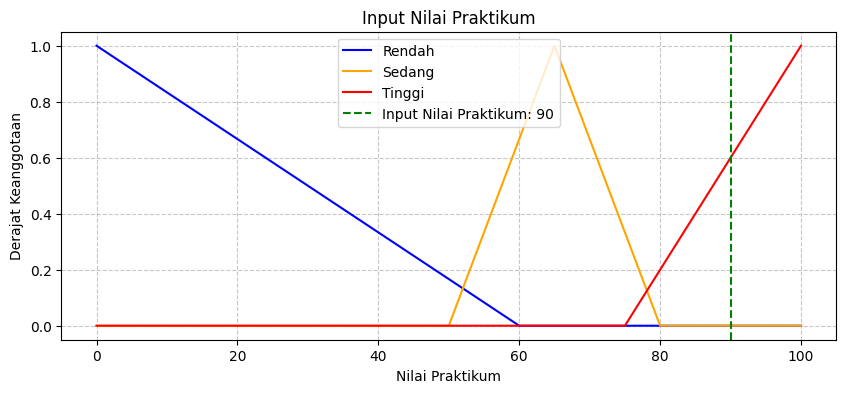

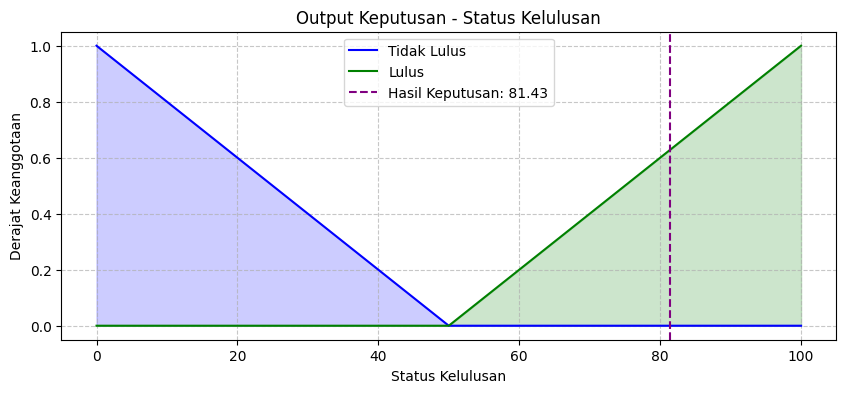

Ingin mengulangi program? (Y/N): n
Program selesai. Terima kasih!


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Mendefinisikan variabel fuzzy untuk kehadiran, nilai ujian, dan nilai praktikum
kehadiran = ctrl.Antecedent(np.arange(0, 101, 1), 'kehadiran')
nilai_ujian = ctrl.Antecedent(np.arange(0, 101, 1), 'nilai_ujian')
nilai_praktikum = ctrl.Antecedent(np.arange(0, 101, 1), 'nilai_praktikum')
status_kelulusan = ctrl.Consequent(np.arange(0, 101, 1), 'status_kelulusan')

# Mendefinisikan fungsi keanggotaan
kehadiran['tidak_pernah'] = fuzz.trimf(kehadiran.universe, [0, 0, 30])
kehadiran['jarang'] = fuzz.trimf(kehadiran.universe, [20, 40, 60])
kehadiran['sering'] = fuzz.trimf(kehadiran.universe, [50, 100, 100])

nilai_ujian['rendah'] = fuzz.trimf(nilai_ujian.universe, [0, 0, 60])
nilai_ujian['sedang'] = fuzz.trimf(nilai_ujian.universe, [50, 65, 80])
nilai_ujian['tinggi'] = fuzz.trimf(nilai_ujian.universe, [75, 100, 100])

nilai_praktikum['rendah'] = fuzz.trimf(nilai_praktikum.universe, [0, 0, 60])
nilai_praktikum['sedang'] = fuzz.trimf(nilai_praktikum.universe, [50, 65, 80])
nilai_praktikum['tinggi'] = fuzz.trimf(nilai_praktikum.universe, [75, 100, 100])

status_kelulusan['tidak_lulus'] = fuzz.trimf(status_kelulusan.universe, [0, 0, 50])
status_kelulusan['lulus'] = fuzz.trimf(status_kelulusan.universe, [50, 100, 100])

# Mendefinisikan aturan fuzzy sesuai dengan tabel rule yang diberikan
rule1 = ctrl.Rule(kehadiran['tidak_pernah'], status_kelulusan['tidak_lulus'])
rule2 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['rendah'] & nilai_ujian['rendah'], status_kelulusan['tidak_lulus'])
rule3 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['rendah'] & nilai_ujian['rendah'], status_kelulusan['tidak_lulus'])
rule4 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['sedang'] & nilai_ujian['rendah'], status_kelulusan['tidak_lulus'])
rule5 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['sedang'] & nilai_ujian['rendah'], status_kelulusan['tidak_lulus'])
rule6 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['tinggi'] & nilai_ujian['rendah'], status_kelulusan['tidak_lulus'])
rule7 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['tinggi'] & nilai_ujian['rendah'], status_kelulusan['tidak_lulus'])
rule8 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['rendah'] & nilai_ujian['sedang'], status_kelulusan['tidak_lulus'])
rule9 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['rendah'] & nilai_ujian['sedang'], status_kelulusan['tidak_lulus'])
rule10 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['sedang'] & nilai_ujian['sedang'], status_kelulusan['tidak_lulus'])
rule11 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['sedang'] & nilai_ujian['sedang'], status_kelulusan['lulus'])
rule12 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['tinggi'] & nilai_ujian['sedang'], status_kelulusan['lulus'])
rule13 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['tinggi'] & nilai_ujian['sedang'], status_kelulusan['lulus'])
rule14 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['rendah'] & nilai_ujian['tinggi'], status_kelulusan['tidak_lulus'])
rule15 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['rendah'] & nilai_ujian['tinggi'], status_kelulusan['tidak_lulus'])
rule16 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['sedang'] & nilai_ujian['tinggi'], status_kelulusan['lulus'])
rule17 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['sedang'] & nilai_ujian['tinggi'], status_kelulusan['lulus'])
rule18 = ctrl.Rule(kehadiran['jarang'] & nilai_praktikum['tinggi'] & nilai_ujian['tinggi'], status_kelulusan['lulus'])
rule19 = ctrl.Rule(kehadiran['sering'] & nilai_praktikum['tinggi'] & nilai_ujian['tinggi'], status_kelulusan['lulus'])

# Define the list of rules
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
         rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19]

# Membangun sistem kontrol dari aturan yang sudah didefinisikan
kelulusan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                     rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
keputusan_kelulusan = ctrl.ControlSystemSimulation(kelulusan_ctrl)

def main_program():
    nama = input("Masukkan nama mahasiswa: ")
    input_kehadiran = int(input("Masukkan persentase kehadiran dalam persen (0-100): "))
    input_nilai_ujian = int(input("Masukkan nilai ujian (0-100): "))
    input_nilai_praktikum = int(input("Masukkan nilai praktikum (0-100): "))

    keputusan_kelulusan.input['kehadiran'] = input_kehadiran
    keputusan_kelulusan.input['nilai_ujian'] = input_nilai_ujian
    keputusan_kelulusan.input['nilai_praktikum'] = input_nilai_praktikum

    keputusan_kelulusan.compute()

    print("\n--- Hasil Fuzzifikasi ---")
    print("Kehadiran")
    print(f"Tidak Pernah = {kehadiran['tidak_pernah'].mf[input_kehadiran]:.2f}")
    print(f"Jarang = {kehadiran['jarang'].mf[input_kehadiran]:.2f}")
    print(f"Sering = {kehadiran['sering'].mf[input_kehadiran]:.2f}")

    print("\nNilai Ujian")
    print(f"Rendah = {nilai_ujian['rendah'].mf[input_nilai_ujian]:.2f}")
    print(f"Sedang = {nilai_ujian['sedang'].mf[input_nilai_ujian]:.2f}")
    print(f"Tinggi = {nilai_ujian['tinggi'].mf[input_nilai_ujian]:.2f}")

    print("\nNilai Praktikum")
    print(f"Rendah = {nilai_praktikum['rendah'].mf[input_nilai_praktikum]:.2f}")
    print(f"Sedang = {nilai_praktikum['sedang'].mf[input_nilai_praktikum]:.2f}")
    print(f"Tinggi = {nilai_praktikum['tinggi'].mf[input_nilai_praktikum]:.2f}")


    hasil = keputusan_kelulusan.output['status_kelulusan']
    print(f"\nNama Mahasiswa: {nama}")
    print(f"Keputusan Status Kelulusan: {hasil:.2f}")

    if hasil >= 50:
        print("Mahasiswa dinyatakan lulus.")
    else:
        print("Mahasiswa dinyatakan tidak lulus.")

    # Plotting visualisasi fungsi keanggotaan untuk input
    plt.figure(figsize=(10, 4))
    plt.plot(kehadiran.universe, kehadiran['tidak_pernah'].mf, label='Tidak Pernah', color='blue')
    plt.plot(kehadiran.universe, kehadiran['jarang'].mf, label='Jarang', color='orange')
    plt.plot(kehadiran.universe, kehadiran['sering'].mf, label='Sering', color='red')
    plt.axvline(input_kehadiran, color='green', linestyle='--', label=f'Input Kehadiran: {input_kehadiran}')
    plt.title('Input Kehadiran')
    plt.xlabel('Kehadiran (%)')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(nilai_ujian.universe, nilai_ujian['rendah'].mf, label='Rendah', color='blue')
    plt.plot(nilai_ujian.universe, nilai_ujian['sedang'].mf, label='Sedang', color='orange')
    plt.plot(nilai_ujian.universe, nilai_ujian['tinggi'].mf, label='Tinggi', color='red')
    plt.axvline(input_nilai_ujian, color='green', linestyle='--', label=f'Input Nilai Ujian: {input_nilai_ujian}')
    plt.title('Input Nilai Ujian')
    plt.xlabel('Nilai Ujian')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(nilai_praktikum.universe, nilai_praktikum['rendah'].mf, label='Rendah', color='blue')
    plt.plot(nilai_praktikum.universe, nilai_praktikum['sedang'].mf, label='Sedang', color='orange')
    plt.plot(nilai_praktikum.universe, nilai_praktikum['tinggi'].mf, label='Tinggi', color='red')
    plt.axvline(input_nilai_praktikum, color='green', linestyle='--', label=f'Input Nilai Praktikum: {input_nilai_praktikum}')
    plt.title('Input Nilai Praktikum')
    plt.xlabel('Nilai Praktikum')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Plotting hasil keputusan
    plt.figure(figsize=(10, 4))
    plt.plot(status_kelulusan.universe, status_kelulusan['tidak_lulus'].mf, label="Tidak Lulus", color='blue')
    plt.plot(status_kelulusan.universe, status_kelulusan['lulus'].mf, label="Lulus", color='green')
    plt.axvline(hasil, color='purple', linestyle='--', label=f'Hasil Keputusan: {hasil:.2f}')
    plt.fill_between(status_kelulusan.universe, 0, status_kelulusan['tidak_lulus'].mf, color='blue', alpha=0.2)
    plt.fill_between(status_kelulusan.universe, 0, status_kelulusan['lulus'].mf, color='green', alpha=0.2)
    plt.title("Output Keputusan - Status Kelulusan")
    plt.xlabel("Status Kelulusan")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

while True:
    main_program()
    ulang = input("Ingin mengulangi program? (Y/N): ").strip().lower()
    if ulang != 'y':
        print("Program selesai. Terima kasih!")
        break